# Propriétés d'une population fictive de 130 personnes: analyse bivariée

Version du permier mai 2022

130 individus, cinq caractères: age, personnes dans le même foyer, fréquence de lecture du journal, orientation politique, revenu mensuel




## Importer les librairies nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Références bibliographiques

Référence:

* [Statistique descriptive bidimensionnelle](http://wikistat.fr/pdf/st-l-des-bi.pdf) (Site Wikistat)


Compléments:

* Hamon : Hamon Philippe, Hamon Agnès, et Jégou Nicolas, _Statistique descriptive. Cours et exercices corrigés_, Rennes, PUR, 2008.
* Saly : Saly Pierre, _Méthodes statistiques descriptives pour les historiens_, Paris, A. Colin, 1991.
* [Statology - Tutorials](https://www.statology.org/tutorials/)



## Explorer les observations

* Regrouper et inspecter : la distribution
* Afficher et analyser : les graphiques

In [2]:
### Lire le fichier corrigé manuellement – ne pas effacer !

path = 'data/observations_mod.csv'

obs = pd.read_csv(path)
obs.set_index('id', inplace=True)
obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel
id,,,,,
1,44,3,de temps en temps,droite,9660
2,45,1,tous les jours,droite,7364
3,54,3,de temps en temps,droite,8947
4,86,2,tous les jours,populiste,6317
5,77,2,tous les jours,gauche,6511


In [3]:
## Nombre de lignes et de colonnes du tableau
obs.shape

(130, 5)

In [5]:
# Informations détaillées
obs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 1 to 130
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              130 non-null    int64 
 1   n_foyer          130 non-null    int64 
 2   lecture_journal  130 non-null    object
 3   parti            130 non-null    object
 4   revenu_mensuel   130 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.1+ KB


# Comparaison de deux variables quantitatives

## Comparer l'âge et le revenu 

In [7]:
### Centralité et dispersion du revenu
obs['revenu_mensuel'].describe().round(2)

count      130.00
mean      7984.73
std       5604.53
min       1400.00
25%       4399.00
50%       7275.50
75%       9236.25
max      45000.00
Name: revenu_mensuel, dtype: float64

<AxesSubplot:>

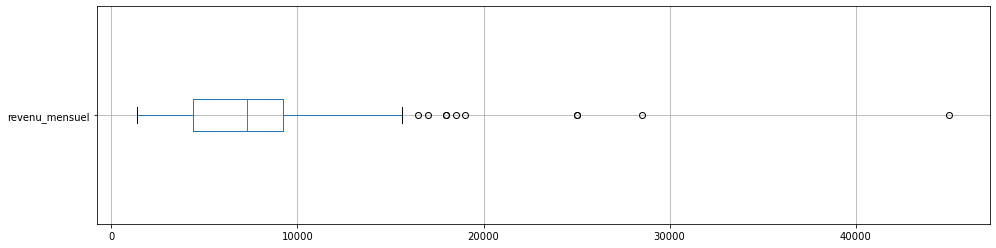

In [8]:
obs.boxplot(column=['revenu_mensuel'], vert=False, figsize=(16,4))

Text(0.5, 1.0, "Comparaison de l'âge et des revenus")

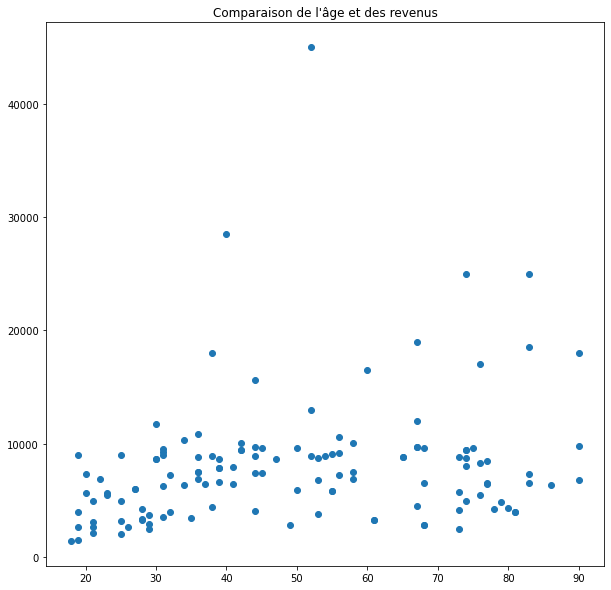

In [27]:
### Nuage de points: âge—revenu 
#  Observer le nuage: voit-on un lien éventuel entre âge et revenu ?

x = list(obs['age'])
y = list(obs['revenu_mensuel'])


plt.rcParams["figure.figsize"] = [10, 10]

plt.plot(x, y, 'o')
plt.title("Comparaison de l'âge et des revenus")



In [10]:
### Coéfficient de corrélation de Pearsons, correlation positive faible
# https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
np.corrcoef([x,y])[1][0].round(4)

0.2333

In [11]:
### Normaliser les valeurs — procédé standard en analyse bivariée pour permettre comparaison: 
#  principe de base cf. Wikistat, Analyse bidimensionnelle, 2.2 
#  Noter que le logiciel adapte automatiquement le graphique et produite la même représentation 
#  https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
arm_obs = obs[['age', 'revenu_mensuel']].copy(deep=True)
norm_obs = (arm_obs-arm_obs.mean())/arm_obs.std()
norm_obs.head()

,age,revenu_mensuel
id,,
1,-0.267565,0.298914
2,-0.219388,-0.110755
3,0.214200,0.171695
4,1.755848,-0.297569
5,1.322259,-0.262954


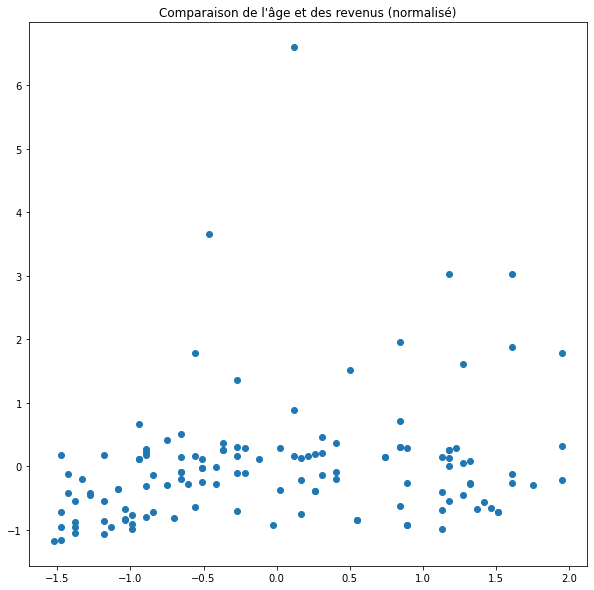

In [28]:
## Nuage de points 

x = list(norm_obs['age'])
y = list(norm_obs['revenu_mensuel'])


plt.rcParams["figure.figsize"] = [10,10]

plt.plot(x, y, 'o')
plt.title("Comparaison de l'âge et des revenus (normalisé)")
plt.show()


In [29]:
### Coéfficient de corrélation de Pearsons 
# https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
np.corrcoef([x,y])[1][0].round(4)

0.2333

Coeff. de Pearsons: 0.2333


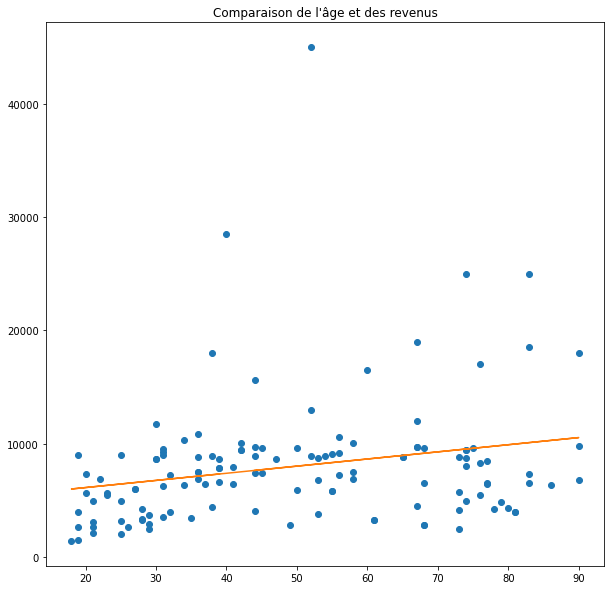

In [30]:
## Nuage de points avec droite de régression
# https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

x = np.array(obs['age'])
y = np.array(obs['revenu_mensuel'])



plt.rcParams["figure.figsize"] = [10,10]

plt.plot(x, y, 'o')
plt.title("Comparaison de l'âge et des revenus")


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

print('Coeff. de Pearsons: {}'.format(np.corrcoef([x,y])[1][0].round(4)))
plt.draw()

Coeff. de Pearsons: 0.1903


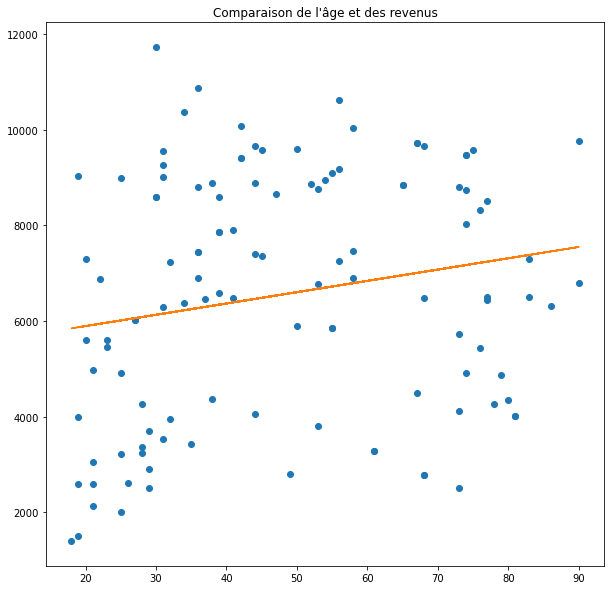

In [31]:
### Nuage de points avec droite de régression: explorer les filtrages
# Filtrer sur les plus jeunes — filtrer sur les revenus plus homogènes
# Comparer la droite de régression et le coefficient de Pearsons
# https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

"""
x = np.array(obs[obs['revenu_mensuel'] < 12000]['age'])
y = np.array(obs[obs['revenu_mensuel'] < 12000]['revenu_mensuel'])
"""
x = np.array(obs[obs['revenu_mensuel'] < 12000]['age'])
y = np.array(obs[obs['revenu_mensuel'] < 12000]['revenu_mensuel'])


"""
x = np.array(obs[obs['age'] < 50]['age'])
y = np.array(obs[obs['age'] < 50]['revenu_mensuel'])
"""


plt.rcParams["figure.figsize"] = [10,10]

plt.plot(x, y, 'o')
plt.title("Comparaison de l'âge et des revenus")


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

print('Coeff. de Pearsons: {}'.format(np.corrcoef([x,y])[1][0].round(4)))
plt.draw()

### Utiliser coefficient de correlation de Spearman

In [32]:
### Spearman correlation coefficient in pandas
#  https://stackabuse.com/calculating-spearmans-rank-correlation-coefficient-in-python-with-pandas/
corr_spear = obs[['age','revenu_mensuel']].corr(method="spearman")
# corr_spear
corr_spear.iloc[0,1]


0.2993430680760555

In [33]:
### Le filtre sur l'âge augmente la corrélation
#  https://stackabuse.com/calculating-spearmans-rank-correlation-coefficient-in-python-with-pandas/
corr_spear = obs[obs['age'] < 50][['age','revenu_mensuel']].corr(method="spearman")
# corr_spear
corr_spear.iloc[0,1]


0.5483214948641095

In [34]:
### Le filtre sur les révénus diminue la correlation
#  https://stackabuse.com/calculating-spearmans-rank-correlation-coefficient-in-python-with-pandas/
corr_spear = obs[obs['revenu_mensuel'] < 12000][['age','revenu_mensuel']].corr(method="spearman")
# corr_spear
corr_spear.iloc[0,1]


0.23653656326533012

# Application au cas des étudiant·e·s suisses

Y a-t-il corrélation entre l'effectif des étrangers et femmes ?

In [35]:
chemin_e = '../visualisation_exploration/data/etudiantes_universites_suisses_v3.csv'

In [36]:
### Lire le fichier 
obs_e = pd.read_csv(chemin_e, sep='\t')
obs_e.head()

,Année,Zürich,Basel,Genf,Bern,Lausanne,Freiburg,Neuenburg,Total,Zurich_f,...,Zürich_e,Basel_e,Genf_e,Bern_e,Lausanne_e,Freiburg_e,Neuenburg_e,Total_e,Total_h,Total_s
0,1891/92,543,401,536,534,289,168,60,2531,67,...,192,75,347.0,126,89.0,56,1.0,886.0,2289,1645
1,1892/93,582,442,594,567,349,173,50,2757,98,...,228,80,361.0,160,133.0,69,3.0,1034.0,2463,1723
2,1893/94,627,435,598,566,416,196,65,2903,133,...,252,85,361.0,157,178.0,88,5.0,1126.0,2558,1777
3,1894/95,681,459,653,630,402,240,59,3124,143,...,287,99,407.0,189,166.0,125,5.0,1278.0,2752,1846
4,1895/96,678,410,685,625,421,242,61,3122,154,...,312,80,442.0,180,186.0,114,11.0,1325.0,2715,1797


In [37]:
obs_e.tail()

,Année,Zürich,Basel,Genf,Bern,Lausanne,Freiburg,Neuenburg,Total,Zurich_f,...,Zürich_e,Basel_e,Genf_e,Bern_e,Lausanne_e,Freiburg_e,Neuenburg_e,Total_e,Total_h,Total_s
95,1986/87,18653,6676,11432,8952,9621,5358,2257,62949,7412,...,1950,801,4041.0,685,2547.0,1255,411.0,11690.0,37673,51259
96,1987/88,19337,6713,11465,9059,9728,5338,2351,63991,7866,...,1942,837,NaN,454,NaN,1253,NaN,NaN,37921,0
97,1988/89,20145,6685,11500,9295,10092,5439,2394,65550,8445,...,1986,918,NaN,486,NaN,1273,NaN,NaN,38434,0
98,1989/90,20690,6762,11979,9508,10437,5814,2512,67702,8814,...,2074,987,4251.0,475,2759.0,1406,542.0,12494.0,39132,55208
99,1990/91,21178,6808,12592,9744,11138,6327,2693,70480,9310,...,2105,1059,4623.0,525,2934.0,1535,620.0,13401.0,40013,57079


In [38]:
obs_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Année        100 non-null    object 
 1   Zürich       100 non-null    int64  
 2   Basel        100 non-null    int64  
 3   Genf         100 non-null    int64  
 4   Bern         100 non-null    int64  
 5   Lausanne     100 non-null    int64  
 6   Freiburg     100 non-null    int64  
 7   Neuenburg    100 non-null    int64  
 8   Total        100 non-null    int64  
 9   Zurich_f     100 non-null    int64  
 10  Bâle_f       100 non-null    int64  
 11  Genève_f     100 non-null    int64  
 12  Berne_f      100 non-null    int64  
 13  Lausanne_f   100 non-null    int64  
 14  Fribourg_f   100 non-null    int64  
 15  Neuchâtel_f  100 non-null    int64  
 16  Total_f      100 non-null    int64  
 17  Zürich_e     100 non-null    int64  
 18  Basel_e      100 non-null    int64  
 19  Genf_e   

In [39]:
obs_e['Total_f'].isnull().values.sum()

0

In [40]:
obs_e['Total_e'].isnull().values.sum()

2

In [41]:
### Traiter les valeurs vides, i.e. Null, par remplacement
obs_e[['Total_f','Total_e']].fillna(0).tail()

,Total_f,Total_e
95,25276,11690.0
96,26070,0.0
97,27116,0.0
98,28570,12494.0
99,30467,13401.0


In [42]:
### Traiter les valeurs vides, i.e. Null, par exlusion des lignes
#  Méthode retenue après tests sur le rendu
obs_e2 = obs_e[obs_e['Année'] < '1987'][['Total_f','Total_e', 'Total_s']]
obs_e2.tail()

,Total_f,Total_e,Total_s
91,21357,11125.0,44766
92,22820,11462.0,47279
93,23888,11457.0,49331
94,24703,11656.0,50273
95,25276,11690.0,51259


Coeff. de Pearsons: 0.9226
Coeff. de Spearman: 0.8964324470971242


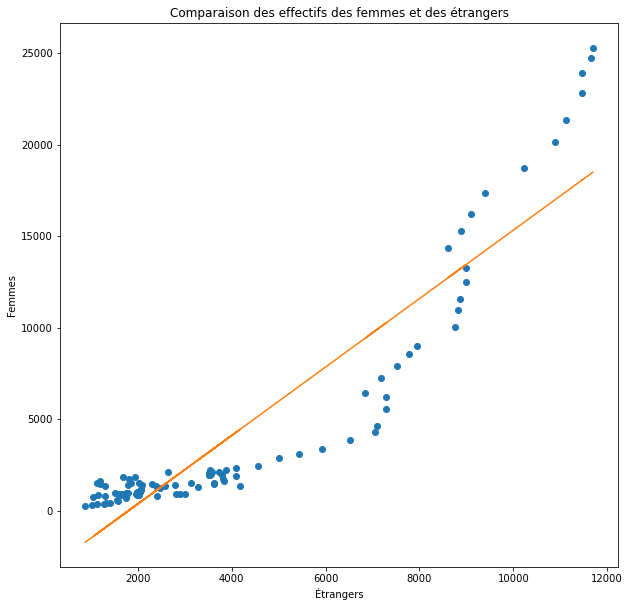

In [44]:
## Effectifs des étrangers et des femmes
# https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

x = np.array(obs_e2['Total_e'])
y = np.array(obs_e2['Total_f'])


plt.rcParams["figure.figsize"] = [10, 10]

plt.plot(x, y, 'o')
plt.title("Comparaison des effectifs des femmes et des étrangers")
plt.xlabel("Étrangers")
plt.ylabel('Femmes')


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

print('Coeff. de Pearsons: {}'.format(np.corrcoef([x,y])[1][0].round(4)))
corr_spear = obs_e2[['Total_e','Total_f']].corr(method="spearman")
print('Coeff. de Spearman: {}'.format(corr_spear.iloc[0,1]))

plt.show()

In [45]:
### Limiter la période, seulement avant l'Entre-deux-guerres — ou avant la Ière GM
# Cf. les effectifs importants d'étudiantes mises en évidence dans le carnet des séries temporelles

obs_e3 = obs_e[obs_e['Année'] < '1908'][['Année','Total_f','Total_e', 'Total_s', 'Total']] #  '1908' '1914' '1920'
obs_e3.head()

,Année,Total_f,Total_e,Total_s,Total
0,1891/92,242,886.0,1645,2531
1,1892/93,294,1034.0,1723,2757
2,1893/94,345,1126.0,1777,2903
3,1894/95,372,1278.0,1846,3124
4,1895/96,407,1325.0,1797,3122


In [46]:
obs_e3.tail()

,Année,Total_f,Total_e,Total_s,Total
12,1903/04,1338,2588.0,2354,4942
13,1904/05,1398,2791.0,2428,5219
14,1905/06,1536,3125.0,2487,5612
15,1906/07,1943,3784.0,2660,6444
16,1907/08,1902,4096.0,2809,6905


Coeff. de Pearsons: 0.9888
Coeff. de Spearman: 0.9926470588235294


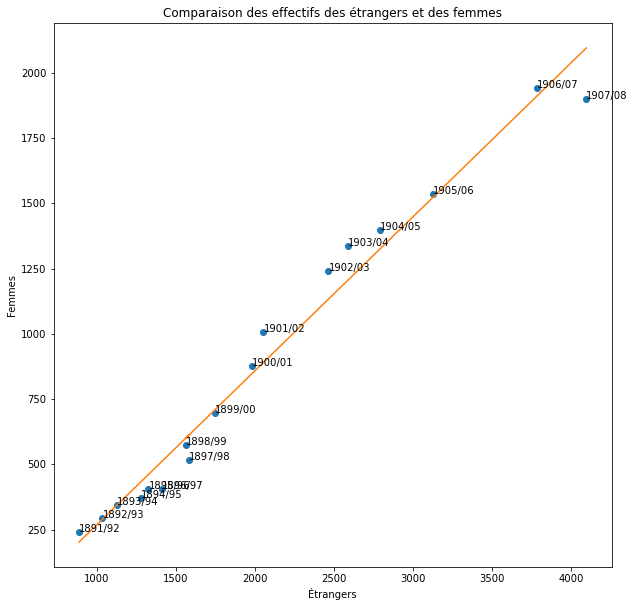

In [47]:
## Effectifs des étrangers et des femmes
# https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python


x = np.array(obs_e3['Total_e'])
y = np.array(obs_e3['Total_f'])

plt.rcParams["figure.figsize"] = [10, 10]

plt.plot(x, y, 'o')
plt.title("Comparaison des effectifs des étrangers et des femmes")

### https://dataplotplus.com/add-text-labels-scatter-plot-in-python/
[plt.text(x=row['Total_e'], y=row['Total_f'], s=row['Année']) for k,row in obs_e3.iterrows()]

plt.xlabel('Étrangers')
plt.ylabel('Femmes')


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

print('Coeff. de Pearsons: {}'.format(np.corrcoef([x,y])[1][0].round(4)))
corr_spear = obs_e3[['Total_e','Total_f']].corr(method="spearman")
print('Coeff. de Spearman: {}'.format(corr_spear.iloc[0,1]))
plt.show()

Coeff. de Pearsons: 0.9835
Coeff. de Spearman: 0.9901960784313726


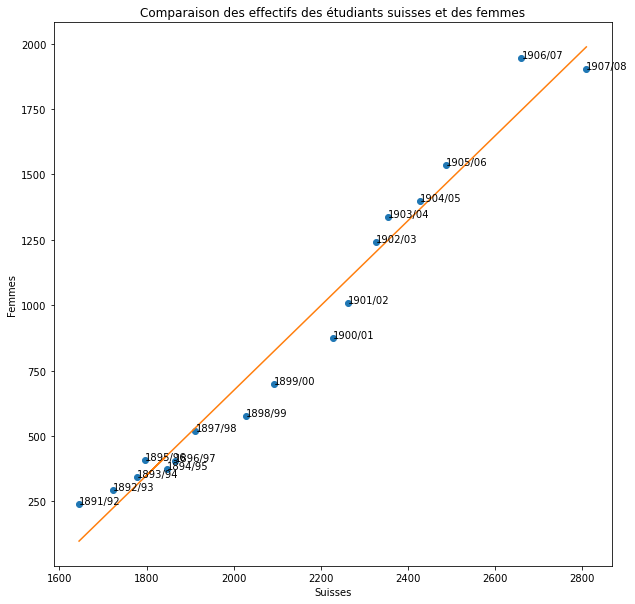

In [48]:
## Effectif des suisses et des femmes, période restreinte
# https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python


x = np.array(obs_e3['Total_s'])
y = np.array(obs_e3['Total_f'])

plt.rcParams["figure.figsize"] = [10, 10]

plt.plot(x, y, 'o')
plt.title("Comparaison des effectifs des étudiants suisses et des femmes")

### https://dataplotplus.com/add-text-labels-scatter-plot-in-python/
[plt.text(x=row['Total_s'], y=row['Total_f'], s=row['Année']) for k,row in obs_e3.iterrows()]

plt.xlabel('Suisses')
plt.ylabel('Femmes')

# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

print('Coeff. de Pearsons: {}'.format(np.corrcoef([x,y])[1][0].round(4)))
corr_spear = obs_e3[['Total_s','Total_f']].corr(method="spearman")
print('Coeff. de Spearman: {}'.format(corr_spear.iloc[0,1]))
plt.show()

Coeff. de Pearsons: 0.9912
Coeff. de Spearman: 0.9901960784313726


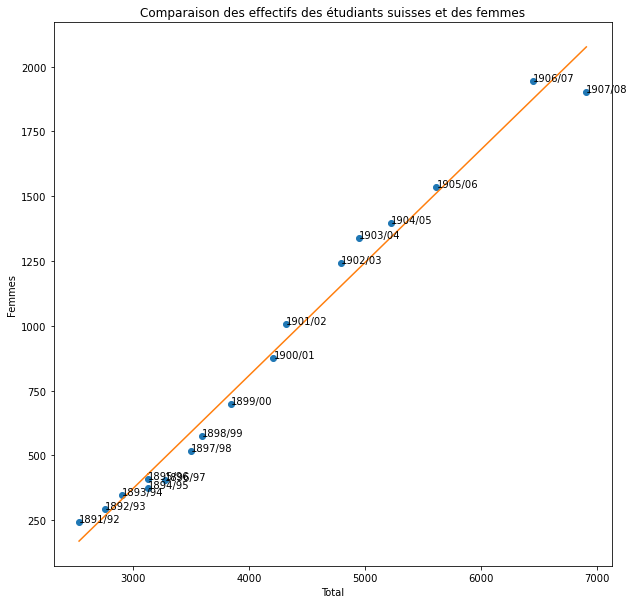

In [49]:
## Effectifs total et des femmes
# https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python


x = np.array(obs_e3['Total'])
y = np.array(obs_e3['Total_f'])

plt.rcParams["figure.figsize"] = [10, 10]

plt.plot(x, y, 'o')
plt.title("Comparaison des effectifs des étudiants suisses et des femmes")

### https://dataplotplus.com/add-text-labels-scatter-plot-in-python/
[plt.text(x=row['Total'], y=row['Total_f'], s=row['Année']) for k,row in obs_e3.iterrows()]

plt.xlabel('Total')
plt.ylabel('Femmes')

# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

print('Coeff. de Pearsons: {}'.format(np.corrcoef([x,y])[1][0].round(4)))
corr_spear = obs_e3[['Total','Total_f']].corr(method="spearman")
print('Coeff. de Spearman: {}'.format(corr_spear.iloc[0,1]))
plt.show()

Coeff. de Pearsons: 0.9986
Coeff. de Spearman: 0.9950980392156863


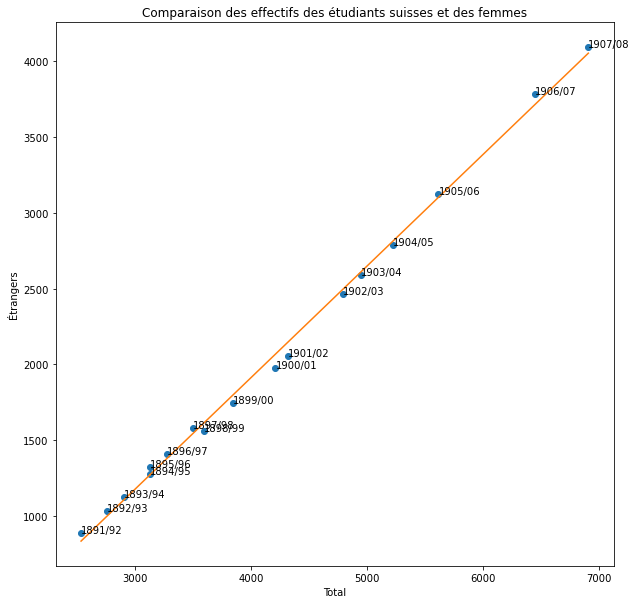

In [50]:
## Effectifs total et des étrangers
# https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python


x = np.array(obs_e3['Total'])
y = np.array(obs_e3['Total_e'])

plt.rcParams["figure.figsize"] = [10, 10]

plt.plot(x, y, 'o')
plt.title("Comparaison des effectifs des étudiants suisses et des femmes")

### https://dataplotplus.com/add-text-labels-scatter-plot-in-python/
[plt.text(x=row['Total'], y=row['Total_e'], s=row['Année']) for k,row in obs_e3.iterrows()]

plt.xlabel('Total')
plt.ylabel('Étrangers')

# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

print('Coeff. de Pearsons: {}'.format(np.corrcoef([x,y])[1][0].round(4)))
corr_spear = obs_e3[['Total','Total_e']].corr(method="spearman")
print('Coeff. de Spearman: {}'.format(corr_spear.iloc[0,1]))
plt.show()

### Conclusion: plus d'étrangers _donc_ plus de femmes ?

L'augmentation d'effectifs d'étudiants étrangers et de femmes semble être liée, sur toute la période et sur la période spécifique analysée. Les indices de corrélation paraîssent être plus proches de 1 pour le rapport entre femmes et étrangers.

Ce phénomène est fortement visible avant 1910.

Toutefois on remarque aussi une croissance similaire des effectifs des étrangers. Il n'est donc pas possible de mettre en relation une spécificité.

De plus la croissance dans les différentes Universités n'étant pas la même, il faudrait une analyse plus précise, voire une collecte supplémentaire d'informations



## Effectif du foyer et revenu

In [51]:
obs['n_foyer'].describe()

count    130.000000
mean       2.130769
std        1.163984
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: n_foyer, dtype: float64

<AxesSubplot:>

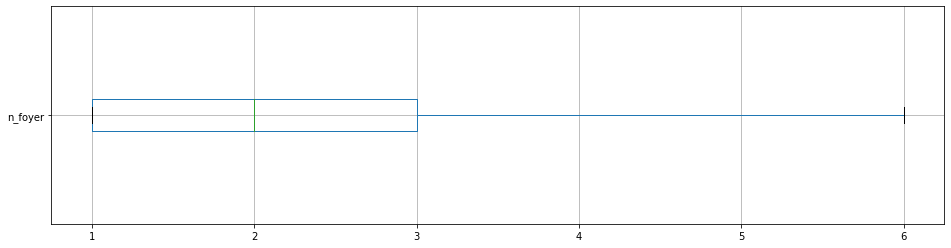

In [52]:
obs.boxplot(column=['n_foyer'], vert=False, figsize=(16,4))

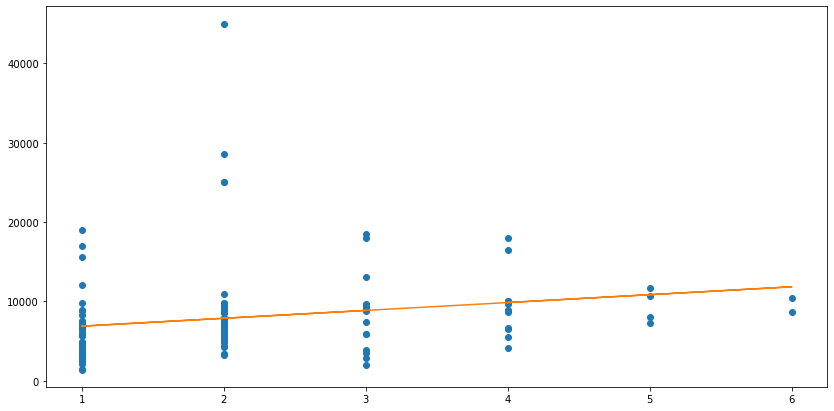

In [53]:
x = np.array(obs['n_foyer'])
y = np.array(obs['revenu_mensuel'])

plt.rcParams["figure.figsize"] = [14, 7]

plt.plot(x, y, 'o')


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

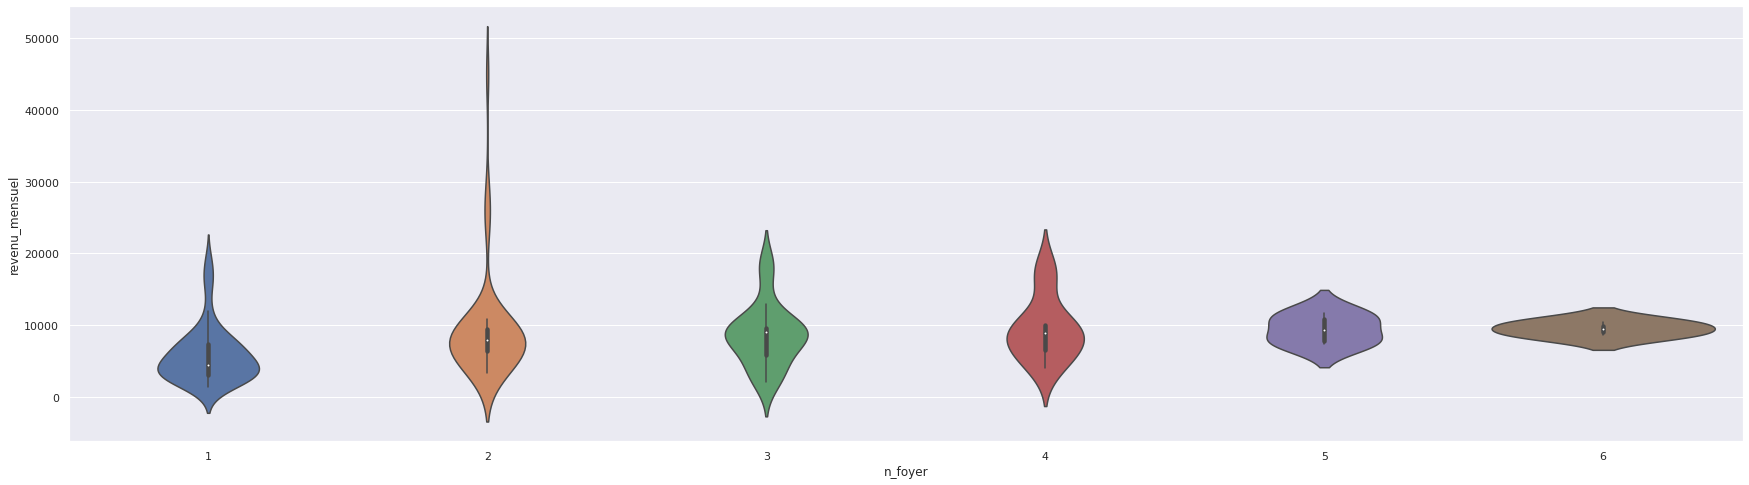

In [63]:
sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 8)})

ax = sns.violinplot(x='n_foyer', y ='revenu_mensuel', data = obs.sort_values('n_foyer',ascending=False))



In [64]:
### Pearson Correlation Coefficient
# https://www.statology.org/pearson-correlation-coefficient/

r = np.corrcoef([x,y])[0][1]
r

0.2060462123695546

In [65]:
corr_spear = obs[['n_foyer','revenu_mensuel']].corr(method="spearman")
print('Coeff. de Spearman: {}'.format(corr_spear.iloc[0,1]))

Coeff. de Spearman: 0.42612282165202736


In [66]:
### https://www.statology.org/pearson-correlation-coefficient/
degree_of_freedom = len(obs)-2
print(degree_of_freedom)
T = r * np.sqrt(degree_of_freedom / (1-r))
T

128


2.616206425213144

In [67]:
### p value
# https://www.statology.org/t-score-p-value-calculator/


# Variable qualitative et quantitative

Text(0, 0.5, 'Parti politique')

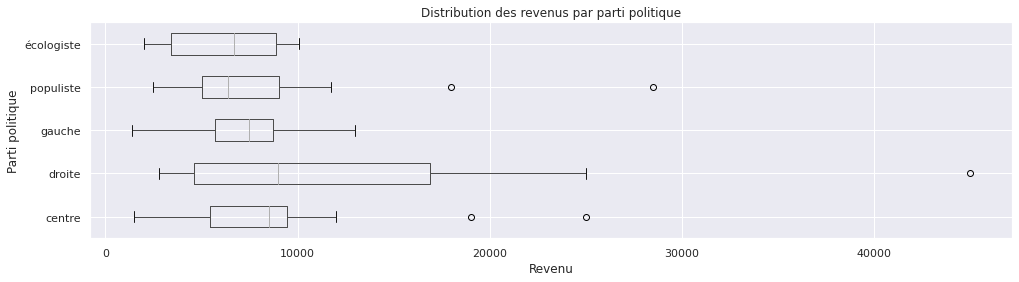

In [68]:
axes = obs.boxplot(column=['revenu_mensuel'],by=['parti'], vert=False, figsize=(16,4), )

fig = axes.get_figure()

fig.suptitle('')
    
axes.set_title('Distribution des revenus par parti politique')

axes.set_xlabel('Revenu')
axes.set_ylabel('Parti politique')


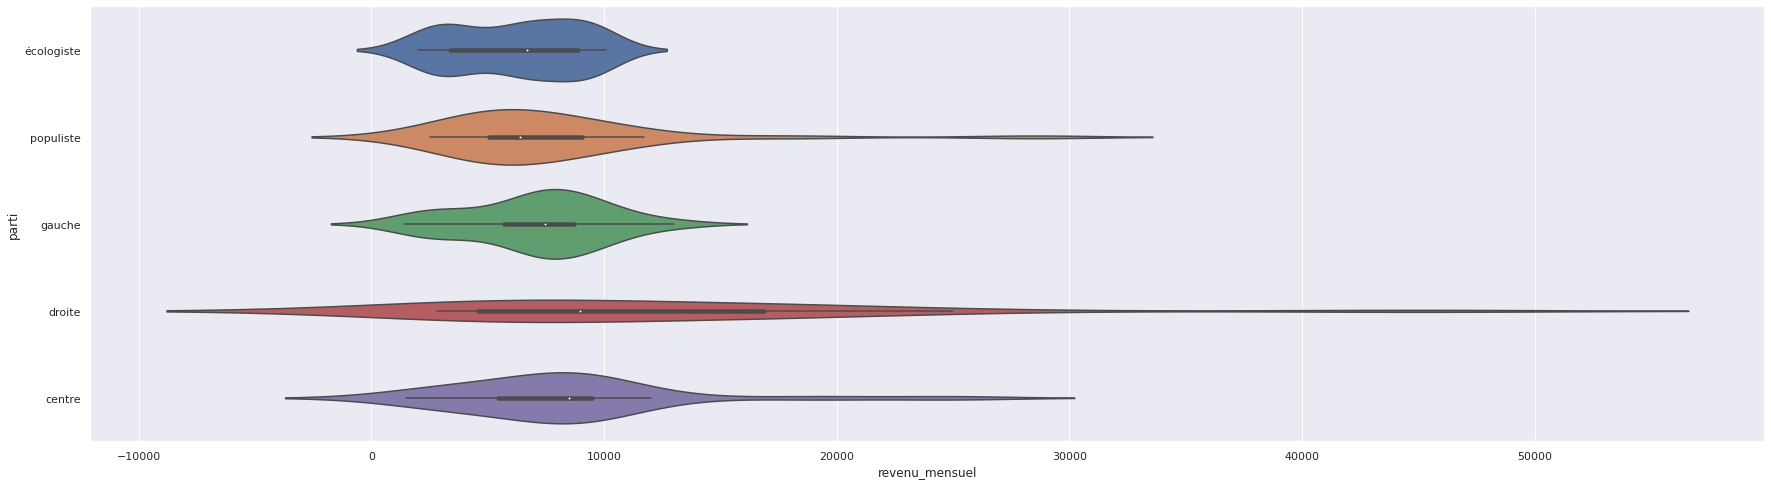

In [69]:
sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 8)})

ax = sns.violinplot(x='revenu_mensuel', y ='parti', data = obs.sort_values('parti',ascending=False))



In [70]:
obs[obs['parti'] == 'populiste']['revenu_mensuel'].describe()

count       30.000000
mean      7674.933333
std       5010.370700
min       2500.000000
25%       5036.750000
50%       6379.000000
75%       9032.750000
max      28500.000000
Name: revenu_mensuel, dtype: float64

# Deux variables qualitatives


* Hamon, Chapitre 4, 99-111


In [71]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
# et coder les années de naissance en relation avec un découpage significatif au point de vue heuristique, et modifiable si besion
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

generations = [18, 26, 36, 46, 56, 66, 91]
c_obs = obs.copy(deep=True)
c_obs['generation'] = pd.cut(c_obs['age'], generations, right=False)
# Inspection
c_obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel,generation
id,,,,,,
1,44,3,de temps en temps,droite,9660,"[36, 46)"
2,45,1,tous les jours,droite,7364,"[36, 46)"
3,54,3,de temps en temps,droite,8947,"[46, 56)"
4,86,2,tous les jours,populiste,6317,"[66, 91)"
5,77,2,tous les jours,gauche,6511,"[66, 91)"


In [72]:
### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a enlevé une unité afin d'avoir des valeurs incluses

c_obs['generation'] = c_obs['generation'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))
c_obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel,generation
id,,,,,,
1,44,3,de temps en temps,droite,9660,36-45
2,45,1,tous les jours,droite,7364,36-45
3,54,3,de temps en temps,droite,8947,46-55
4,86,2,tous les jours,populiste,6317,66-90
5,77,2,tous les jours,gauche,6511,66-90


### Tableau de contingence

In [73]:
### Le type d'origine est 'category' il faut transformer en 'str'
##  pour éviter le message d'erreur en créant la pivot_table
c_obs['generation']= c_obs['generation'].astype(str)

In [74]:
### La fonction pivot_table produit un tableau de contingence
## Au centre du tableau se trouvent les effectifs conjoints, 
## aux bords les effectifs marginaux qui correspondent 
## aux distributions indépendantes des variables

X = "parti"  # "0"
Y = "generation"

c_obs_parti_generation = c_obs[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
c_obs_parti_generation

parti,centre,droite,gauche,populiste,écologiste,Total
generation,,,,,,
18-25,3,2,2,2,9,18
26-35,2,1,5,2,12,22
36-45,1,6,8,5,6,26
46-55,4,3,2,5,0,14
56-65,4,1,0,5,1,11
66-90,11,5,6,11,6,39
Total,25,18,23,30,34,130


In [75]:
### Fréquence conjointe et fréquence marginale (proportion par rapport au total)

c_obs_parti_generation_frequence = np.round(c_obs_parti_generation*100/c_obs_parti_generation.iloc[-1,-1],1)
c_obs_parti_generation_frequence

parti,centre,droite,gauche,populiste,écologiste,Total
generation,,,,,,
18-25,2.3,1.5,1.5,1.5,6.9,13.8
26-35,1.5,0.8,3.8,1.5,9.2,16.9
36-45,0.8,4.6,6.2,3.8,4.6,20.0
46-55,3.1,2.3,1.5,3.8,0.0,10.8
56-65,3.1,0.8,0.0,3.8,0.8,8.5
66-90,8.5,3.8,4.6,8.5,4.6,30.0
Total,19.2,13.8,17.7,23.1,26.2,100.0


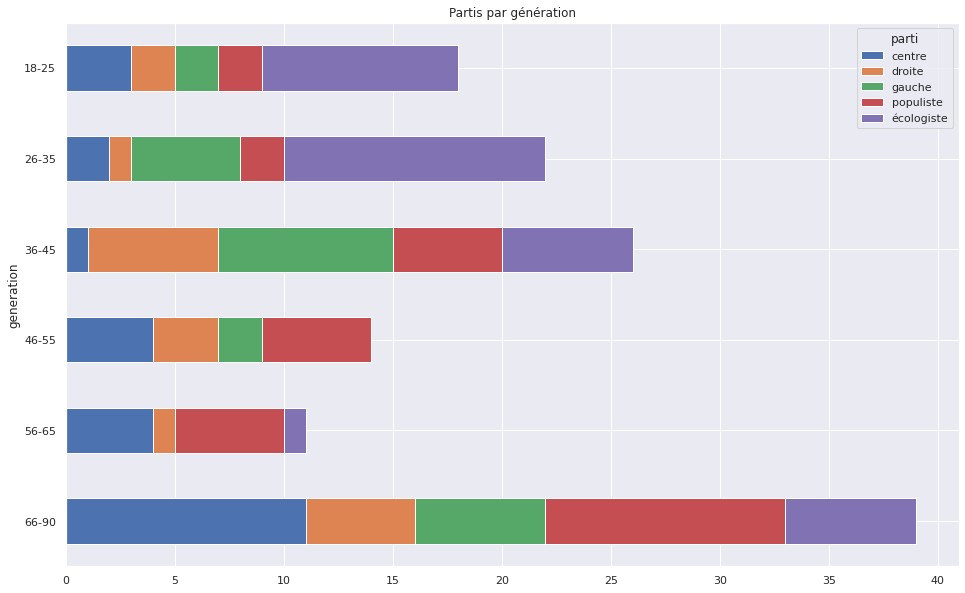

In [76]:
### Effectifs des partis par génération
g = c_obs_parti_generation.iloc[:-1, :-1].sort_index(ascending=False)\
        .plot( kind='barh', stacked=True,  figsize=(16,10),  title = 'Partis par génération')

In [77]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

## pourcentages des lignes
stacked_data = c_obs_parti_generation.apply(lambda x: (x*100/sum(x)*2).round(2), axis=1) # axis=0
stacked_data

parti,centre,droite,gauche,populiste,écologiste,Total
generation,,,,,,
18-25,16.67,11.11,11.11,11.11,50.00,100.0
26-35,9.09,4.55,22.73,9.09,54.55,100.0
36-45,3.85,23.08,30.77,19.23,23.08,100.0
46-55,28.57,21.43,14.29,35.71,0.00,100.0
56-65,36.36,9.09,0.00,45.45,9.09,100.0
66-90,28.21,12.82,15.38,28.21,15.38,100.0
Total,19.23,13.85,17.69,23.08,26.15,100.0


parti       centre  droite  gauche  populiste  écologiste
generation                                               
18-25        16.67   11.11   11.11      11.11       50.00
26-35         9.09    4.55   22.73       9.09       54.55
36-45         3.85   23.08   30.77      19.23       23.08
46-55        28.57   21.43   14.29      35.71        0.00
56-65        36.36    9.09    0.00      45.45        9.09
66-90        28.21   12.82   15.38      28.21       15.38
Total        19.23   13.85   17.69      23.08       26.15


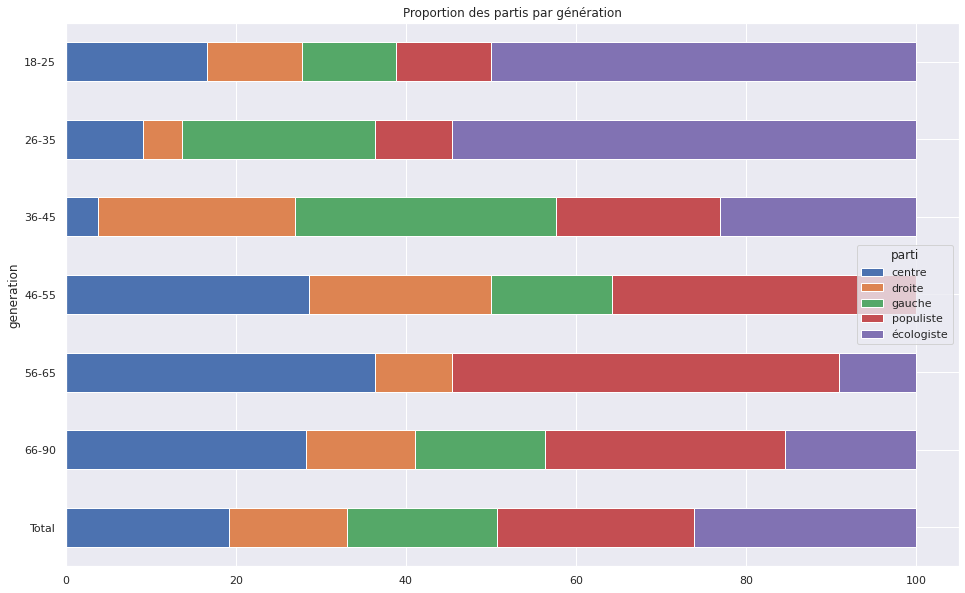

In [78]:
print(stacked_data.iloc[0:, 0:-1])

plot = stacked_data.iloc[0:, 0:-1].sort_values(by=Y, ascending=False)\
.plot(kind="barh", stacked=True, figsize=(16,10), title='Proportion des partis par génération')

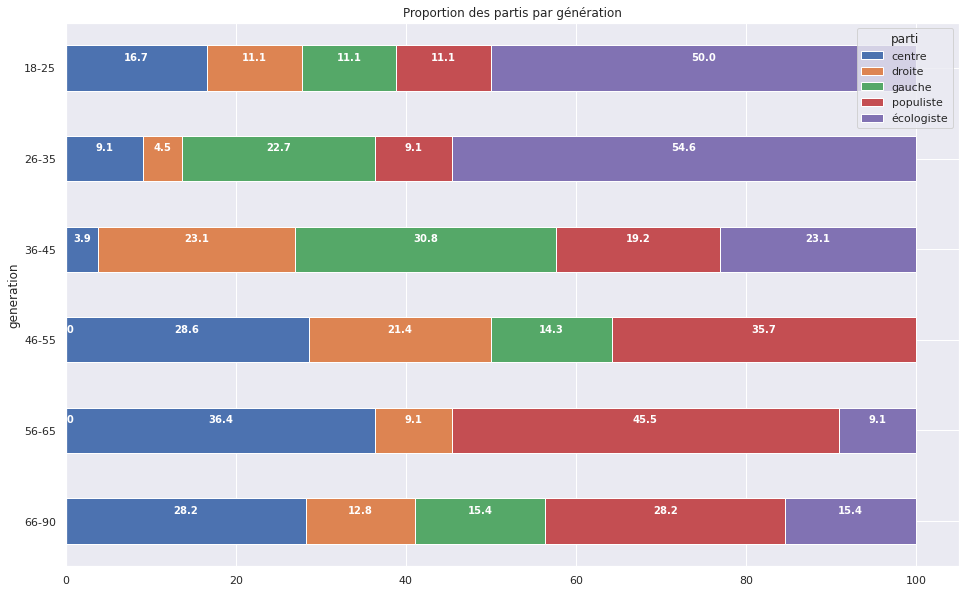

In [79]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

z = stacked_data.iloc[:-1, :-1].sort_index(ascending=False).plot(kind="barh", stacked=True, figsize=(16,10), title='Proportion des partis par génération')

### https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
#b = [(p.get_bbox().bounds, p.get_bbox().xmin,p.get_bbox().ymin, p.get_bbox().ymax, p.get_width(), p.get_y(), p.get_height()) for p in z.patches][59]
#print(b)
for p in z.patches:
    b = p.get_bbox()
    y_value=b.y1-b.y0
    z.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')

In [80]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

## pourcentages des colonnes (ou des lignes après avoir interverti les variables dans le tableau)
# axis=0 à la place de axis=1
stacked_data_col = c_obs_parti_generation.apply(lambda x: round(x*100/sum(x)*2, 2), axis=0) # axis=1
stacked_data_col

parti,centre,droite,gauche,populiste,écologiste,Total
generation,,,,,,
18-25,12.0,11.11,8.70,6.67,26.47,13.85
26-35,8.0,5.56,21.74,6.67,35.29,16.92
36-45,4.0,33.33,34.78,16.67,17.65,20.00
46-55,16.0,16.67,8.70,16.67,0.00,10.77
56-65,16.0,5.56,0.00,16.67,2.94,8.46
66-90,44.0,27.78,26.09,36.67,17.65,30.00
Total,100.0,100.00,100.00,100.00,100.00,100.00


In [81]:
stacked_data_col.transpose()

generation,18-25,26-35,36-45,46-55,56-65,66-90,Total
parti,,,,,,,
centre,12.00,8.00,4.00,16.00,16.00,44.00,100.0
droite,11.11,5.56,33.33,16.67,5.56,27.78,100.0
gauche,8.70,21.74,34.78,8.70,0.00,26.09,100.0
populiste,6.67,6.67,16.67,16.67,16.67,36.67,100.0
écologiste,26.47,35.29,17.65,0.00,2.94,17.65,100.0
Total,13.85,16.92,20.00,10.77,8.46,30.00,100.0


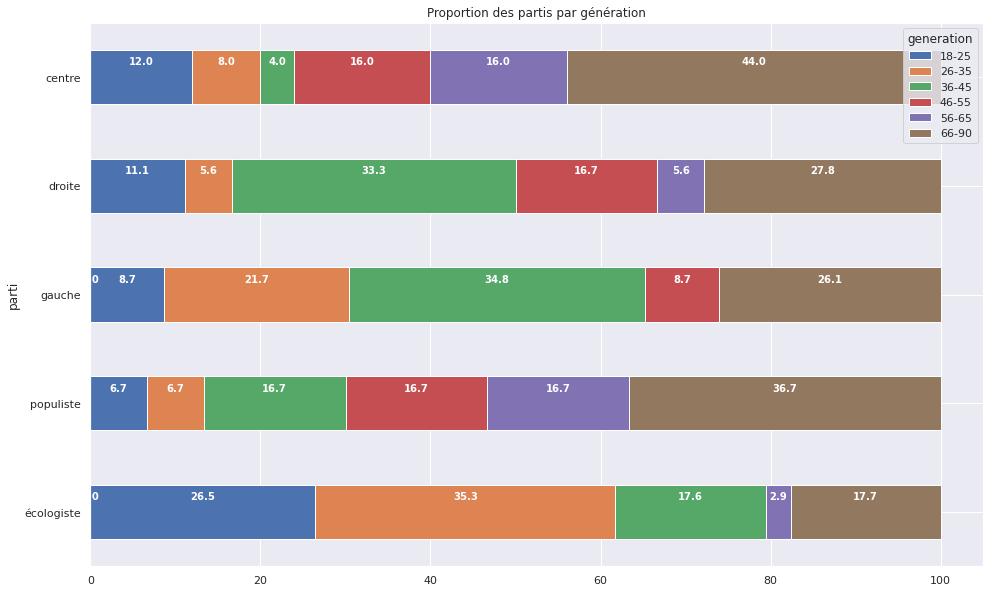

In [82]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

z = stacked_data_col.transpose().iloc[:-1, :-1].sort_index(ascending=False).plot(kind="barh", stacked=True, figsize=(16,10), title='Proportion des partis par génération')

### https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
#b = [(p.get_bbox().bounds, p.get_bbox().xmin,p.get_bbox().ymin, p.get_bbox().ymax, p.get_width(), p.get_y(), p.get_height()) for p in z.patches][59]
#print(b)
for p in z.patches:
    b = p.get_bbox()
    y_value=b.y1-b.y0
    z.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')

### Tableau en cas d'indépendance

Produit des marges divisé par le total et arrondi

In [83]:
### Total général, dernière cellule de la dernière ligne
c_obs_parti_generation.iat[-1,-1]

130

In [84]:
tx = c_obs_parti_generation.loc[:,["Total"]]
ty = c_obs_parti_generation.loc[["Total"],:]
n = c_obs_parti_generation.iat[-1,-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Arrondi
print(indep.astype(int))


parti       centre  droite  gauche  populiste  écologiste  Total
generation                                                      
18-25            3       2       3          4           4     18
26-35            4       3       3          5           5     22
36-45            5       3       4          6           6     26
46-55            2       1       2          3           3     14
56-65            2       1       1          2           2     11
66-90            7       5       6          9          10     39
Total           25      18      23         30          34    130


In [85]:
#c_obs_parti_generation.iloc([:,:])

In [86]:
### Différence en effectifs entre le théorique et l'observé
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (c_obs_parti_generation-indep).iloc[:-1,:-1]
## Attention : arrondi aux entiers dans l'affichage
print(ecarts.astype(int))


parti       centre  droite  gauche  populiste  écologiste
generation                                               
18-25            0       0      -1         -2           4
26-35           -2      -2       1         -3           6
36-45           -4       2       3         -1           0
46-55            1       1       0          1          -3
56-65            1       0      -1          2          -1
66-90            3       0       0          2          -4


In [87]:
### Ecarts positifs et pondérés par les effectifs
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts_ponderes = (c_obs_parti_generation-indep)**2/indep
ecarts_ponderes.iloc[:-1,:-1]

parti,centre,droite,gauche,populiste,écologiste
generation,,,,,
18-25,0.061538,0.097246,0.440654,1.116809,3.913575
26-35,1.176224,1.374437,0.315233,1.864802,6.780584
36-45,3.200000,1.600000,2.513043,0.166667,0.094118
46-55,0.635165,0.581319,0.091830,0.968864,3.661538
56-65,1.679021,0.179643,1.946154,2.386946,1.224517
66-90,1.633333,0.029630,0.117391,0.444444,1.729412


42.02413634169815


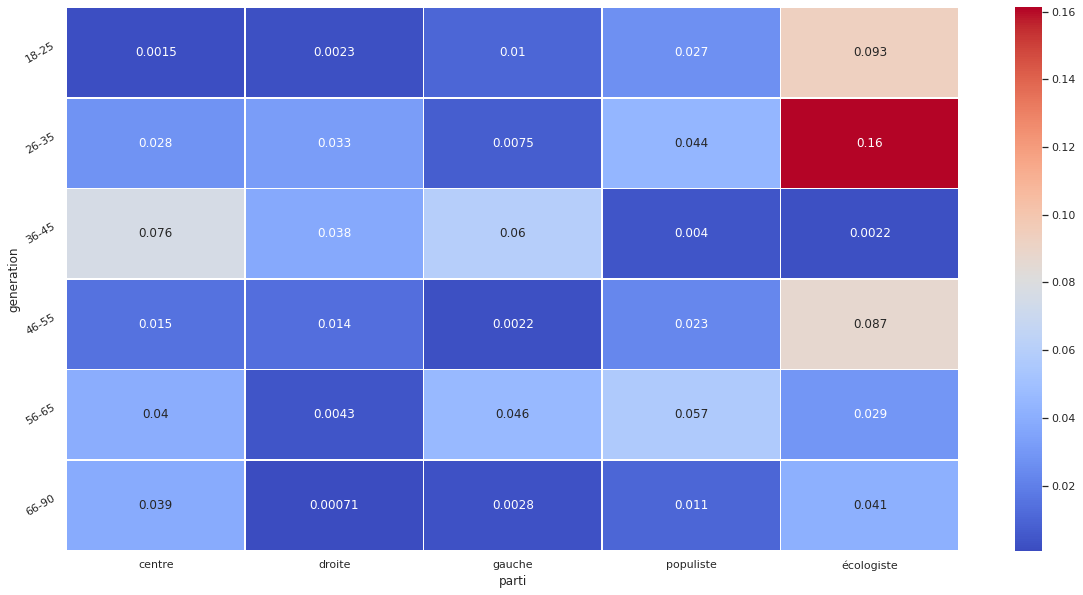

In [88]:
xi_n = ecarts_ponderes.sum().sum()
print(xi_n)


#tableau = ecarts_ponderes.iloc[:-1,:-1]
tableau = ecarts_ponderes.iloc[:-1,:-1]/xi_n
fig, ax = plt.subplots(figsize=(20,10))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)

### Appartenance politique et fréquence de lecture du journal

In [89]:
X = "parti"  # "0"
Y = "lecture_journal"

c_obs_parti_lecture = c_obs[[Y,X]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int) 
c_obs_parti_lecture

lecture_journal,de temps en temps,le week-end,tous les jours,trois-quatre fois par semaine,très rarement,Total
parti,,,,,,
centre,5,6,3,6,5,25
droite,2,4,5,4,3,18
gauche,3,3,2,5,10,23
populiste,4,9,3,9,5,30
écologiste,3,7,6,11,7,34
Total,17,29,19,35,30,130


In [90]:
c_obs_parti_lecture = c_obs_parti_lecture[['très rarement', 'de temps en temps', 'le week-end', 'trois-quatre fois par semaine', 'tous les jours','Total']]
c_obs_parti_lecture

lecture_journal,très rarement,de temps en temps,le week-end,trois-quatre fois par semaine,tous les jours,Total
parti,,,,,,
centre,5,5,6,6,3,25
droite,3,2,4,4,5,18
gauche,10,3,3,5,2,23
populiste,5,4,9,9,3,30
écologiste,7,3,7,11,6,34
Total,30,17,29,35,19,130


In [91]:
### Total général, dernière cellule de la dernière ligne
c_obs_parti_lecture.iat[-1,-1]

130

In [92]:
c_obs_parti_lecture.iloc[:-1,:-1]

lecture_journal,très rarement,de temps en temps,le week-end,trois-quatre fois par semaine,tous les jours
parti,,,,,
centre,5,5,6,6,3
droite,3,2,4,4,5
gauche,10,3,3,5,2
populiste,5,4,9,9,3
écologiste,7,3,7,11,6


In [93]:
tx = c_obs_parti_lecture.loc[:,["Total"]]
ty = c_obs_parti_lecture.loc[["Total"],:]
n = c_obs_parti_lecture.iat[-1,-1]   # .iloc[:-1,:-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Arrondi
display(indep.astype(int))


lecture_journal,très rarement,de temps en temps,le week-end,trois-quatre fois par semaine,tous les jours,Total
parti,,,,,,
centre,5,3,5,6,3,25
droite,4,2,4,4,2,18
gauche,5,3,5,6,3,23
populiste,6,3,6,8,4,30
écologiste,7,4,7,9,4,34
Total,30,17,29,35,19,130


In [94]:
### Différence en effectifs entre le théorique et l'observé
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (c_obs_parti_lecture-indep)
## Attention : arrondi aux entiers dans l'affichage
display(ecarts.iloc[:-1,:-1].astype(int))


lecture_journal,très rarement,de temps en temps,le week-end,trois-quatre fois par semaine,tous les jours
parti,,,,,
centre,0,1,0,0,0
droite,-1,0,0,0,2
gauche,4,0,-2,-1,-1
populiste,-1,0,2,0,-1
écologiste,0,-1,0,1,1


In [95]:
### Ecarts positifs et pondérés par les effectifs
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
#  le chi2 : (valeur observée - valeur attendue)²/valeur attendue
ecarts_ponderes = ((c_obs_parti_lecture-indep)**2/indep).iloc[:-1,:-1]
ecarts_ponderes

lecture_journal,très rarement,de temps en temps,le week-end,trois-quatre fois par semaine,tous les jours
parti,,,,,
centre,0.102564,0.916290,0.032095,0.079341,0.117004
droite,0.320513,0.053193,0.000059,0.147741,2.133693
gauche,4.148272,0.000020,0.884892,0.229575,0.551470
populiste,0.534188,0.001508,0.795756,0.105495,0.437247
écologiste,0.091252,0.470375,0.045062,0.372334,0.213813


12.783749964131287


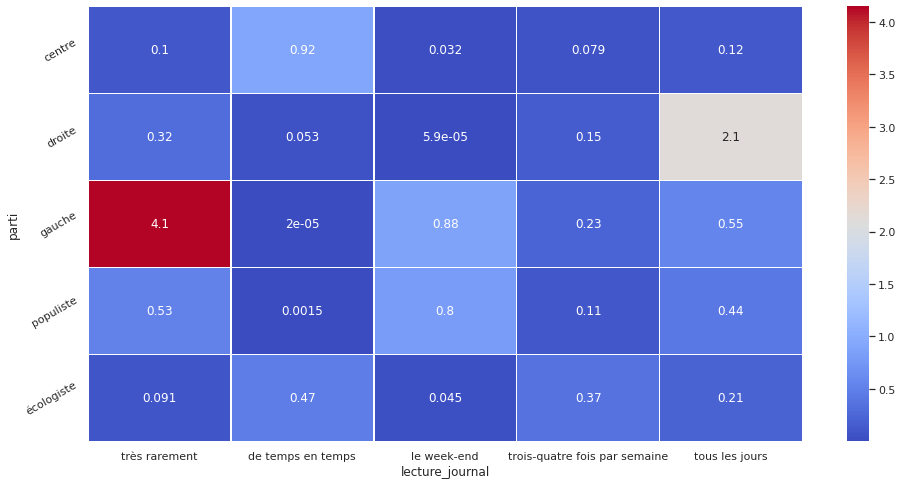

In [96]:
## Chi2 :somme des écarts pondérés

xi_n = ecarts_ponderes.sum().sum() 
print(xi_n)

table = ecarts_ponderes/xi_n
fig, ax = plt.subplots(figsize=(16,8))         
# Sample figsize in inches
g = sns.heatmap(ecarts_ponderes, annot=ecarts_ponderes, cmap="coolwarm", linewidths=.5, ax=ax)
labels = ecarts_ponderes.index

p = g.set_yticklabels(labels, rotation=30)